Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [40]:
NICKNAME = "underham2ter"

---

# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [41]:
from random import randint
from math import isclose
import numpy as np
from scipy import optimize
from matplotlib import patches as pts
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

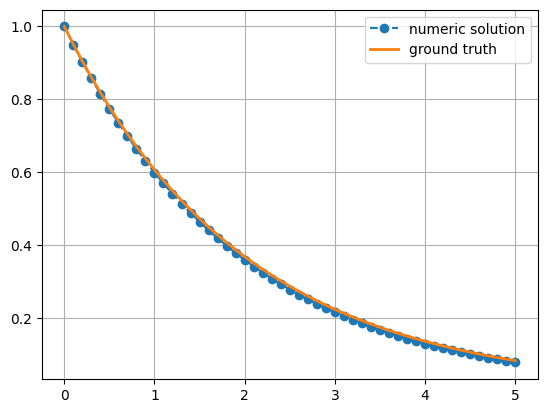

In [43]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Постройте решения как в ячейке выше для различных $\tau$ (в коде это `dt`), включая $|\lambda| \tau > 1$.

(1 point)

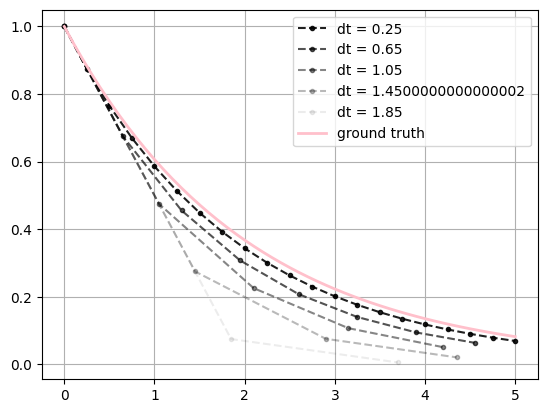

In [44]:
lam = -0.5
dt = 0.25
while dt < 2:
    tt, y = euler_solve(lam, u0=1.0, T=5, dt = dt)
    plt.plot(tt, y, 'o--', label=f'dt = {dt}', alpha=1-dt/2, ms=3, color='black')
    dt += 0.4
tt, y = euler_solve(lam, u0=1.0, T=5, dt = 0.1)
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth', color='pink')
plt.legend()
plt.grid(True)


### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя неявную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(1 point)

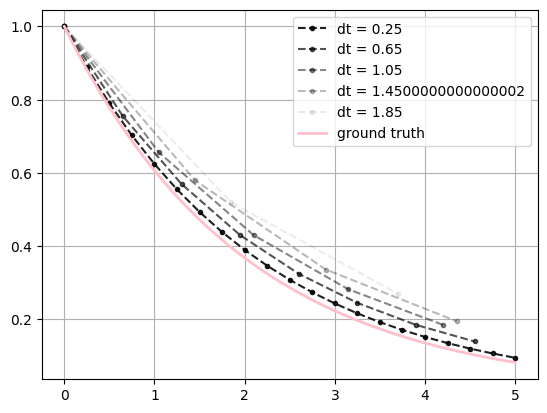

In [45]:
def backward_euler(lam, u0, T, dt):
    """Неявный метод"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1-dt*lam)
    return tt, y

lam = -0.5
dt = 0.25
while dt < 2:
    tt, y = backward_euler(lam, u0=1.0, T=5, dt = dt)
    plt.plot(tt, y, 'o--', label=f'dt = {dt}', alpha=1-dt/2, ms=3, color='black')
    dt += 0.4
tt, y = backward_euler(lam, u0=1.0, T=5, dt = 0.1)
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth', color='pink')
plt.legend()
plt.grid(True)

У обратного метода точность сохраняется дольше вместе с увеличением dt. Обсудили.

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

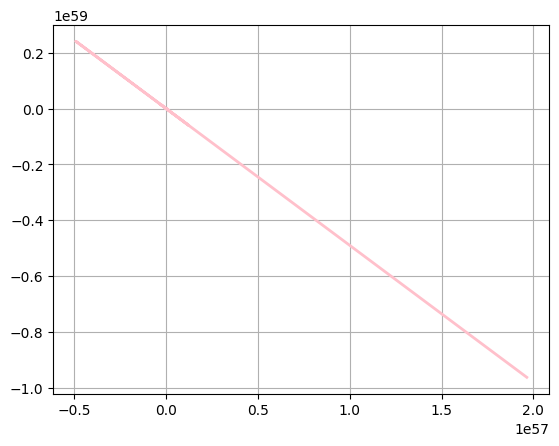

In [46]:
def euler_solve_vector(A, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера с шагом dt"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0] = u0
    for k in range(num_steps):
        y[k+1][0] = y[k][0] + A[0][0]*y[k][0]*dt + A[0][1]*y[k][1]*dt
        y[k+1][1] = y[k][1] + A[1][0]*y[k][0]*dt + A[1][1]*y[k][1]*dt
    return tt, y
A = [[-10, 10],[32, -499]]
dt = 0.01
tt, y = euler_solve_vector(A, u0=[1, 0], T=1, dt = dt)
y_1 = [i[0] for i in y]
y_2 = [i[1] for i in y]
plt.plot(y_1, y_2, '-', lw=2, color='pink')
plt.grid(True)

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(1 point)

In [47]:
ev = np.linalg.eigvals(A)
print(*ev)

-9.346476672269716 -499.6535233277303


Для стабильности нужно
$\mid{\lambda_i*dt+1}\mid < 1$, что не выполняется.

Оба значения меньше нуля, и
$
S =  \frac{max\lambda_i}{min\lambda_i} >> 1
$,
что делает систему жесткой => для нее лучше работают обратные методы.

### Тест II.2

Реализуйте \textit{неявную} схему Эйлера для системы уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(1 point)

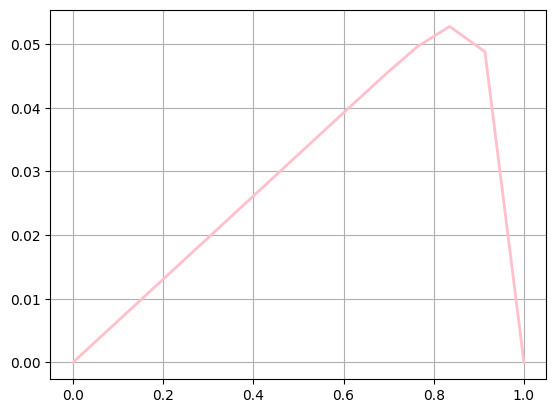

In [48]:
def backward_euler_vector(A, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера с шагом dt"""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])

    y[0] = u0
    C2 = 1-dt*A[1][1] - (dt**2 * A[1][0] * A[0][1])/(1-dt*A[0][0])
    K2 = dt*A[1][0]/(1-dt*A[0][0])
    for k in range(num_steps):
        y[k+1][1] = (K2 * y[k][0] + y[k][1])/C2
        y[k+1][0] = (y[k][0] + dt * A[0][1] * y[k+1][1])/(1 - dt * A[0][0])
    return tt, y
A = [[-10, 10],[32, -499]]
dt = 0.01
tt, y = backward_euler_vector(A, u0=[1, 0], T=1, dt = dt)
y_1 = [i[0] for i in y]
y_2 = [i[1] for i in y]
plt.plot(y_1, y_2, '-', lw=2, color='pink')
plt.grid(True)

Я нигде не ошибся похоже))) Работает зашибись!! Прямой метод такое только на dt= 0.001 делает!

# III. Модель Ланкастера

Рассмотрим модель Ланкастера: две армии, численность которых $x_1(t)$
и $x_2(t)$ соответственно, истребляют друг друга:

$$
\begin{cases}
\frac{d\,x_1}{dt} = - c_2 x_2,\\
\frac{d\,x_2}{dt} = - c_1 x_1
\end{cases}
$$

Война заканчивается в момент времени $T$, если численность какой-то из армий становится равна нулю $x_i(T)=0$ .


Для удоства будем исчилять время в $1/c_1$, тогда далее везде считаем $c_1=1, c_2=c$.

$
\frac{d}{dt}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}= 
\begin{pmatrix}
0& -c\\
-1& 0
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$
Можно явно выписать решение, найдя характеристические числа и собственные вектора
$
\mathbf{x} = \sum_\pm C_{\pm}\mathbf{e_\pm} e^{\lambda_{\pm}t}, \; \lambda_{\pm} = \pm \sqrt{c}, \mathbf{e}_{\pm} = (\mp \sqrt{c}, 1)
$

### Тест III.1 
Однако, если нас интересуют фазовые траектории(например кто победит), достаточно заметить, что у этой системы есть первый интеграл движения $I(x,y)=const$ (она Гамильтонова).

Найдите его, какая начальная численность первой армии $x_1(0)$ необходима для её победы? $x_{1min}(c, x_2(0))$

$I(x,y)=Cy^2-x^2=4C_1C_2C$, где $C_1 = 1/2(y_0 + \frac{x_0}{\sqrt{C}}), C_2= 1/2(y_0 - \frac{x_0}{\sqrt{C}})$

$Cy^2-x^2=Cy_0^2-x_0^2$

$x ~~ victorious ~ => y = 0; $

$x_0^2 = Cy_0^2-x^2>\{x - целое ~~ число ~~ воинов\}>Cy_0^2-1$

$x_{min}(0)=\sqrt{Cy(0)^2-1}$

$x_{min}(0)=\sqrt{C}y(0) \{x ~~может ~~принимать ~~нецелые ~~значения\}$

### Тест III.2

Поробуем численно решить задачу для $c=2, x_2(0)=1$ при трёх начальных $x_1(0) = x_{1min}(c=2,x_2(0)=1)\times[1+10^{-2}, 1+ 10^{-1}, 2]$. 

Подправьте явную или неявную схему Эйлера так, чтобы она интегрировала до момента победы.
Реализуйте схему Рунге - Кутта второго порядка с тем же требованием.


**Постройте в двойном логарифмическом масштабе отклонение $I(T)$ от истинного значения
$\delta I = |I(x(T),y(T)) - I(x_1(0),x_2(0)|$ , в зависимости от шага интегрирования $\tau$** проинтегрировав 
* Методом Эйлера для трёх указнных $x_1(0)$ и различных $\tau$
* Методом Рунге - Кутта для трёх указанных $x_1(0)$ и различных $\tau$

(Должно быть 6 линий на графике - двумя методами каждую из $x_1(0)$)

(Используйте сплошные линии для Эйлера и пунктирные для РК, цветом различайте начальные $x_1(0)$)

(Шаги интегрирования $\tau$ удобно уменьшать как $2^{-N}$ или сгенерировать как `np.logspace` )

*Как полученные кривые соотносятся с теоретическим порядком аппроксимации схем?*


(4 point)

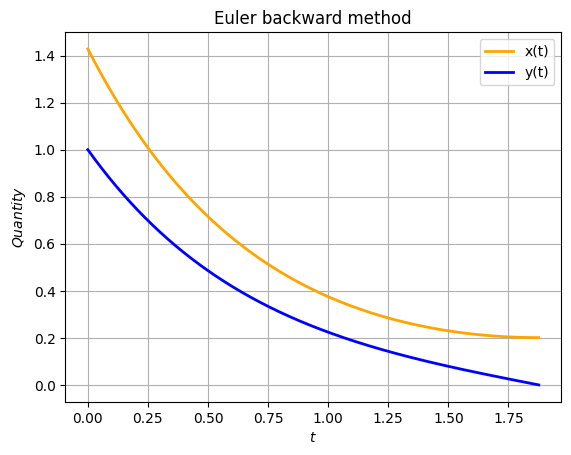

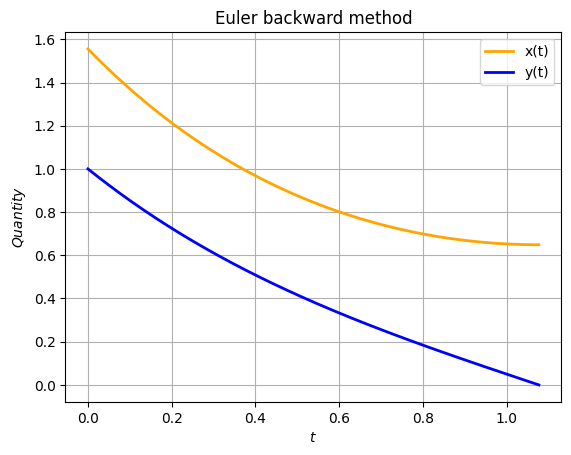

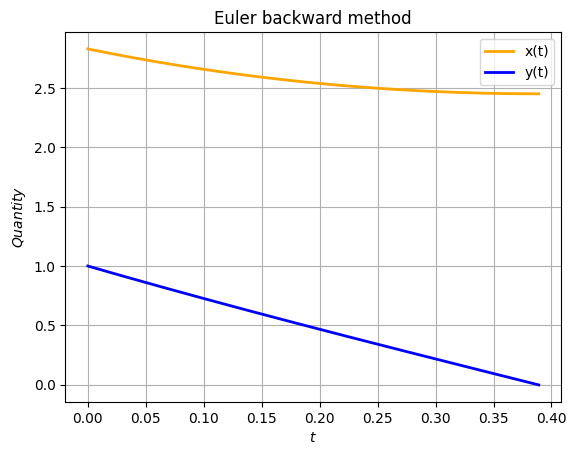

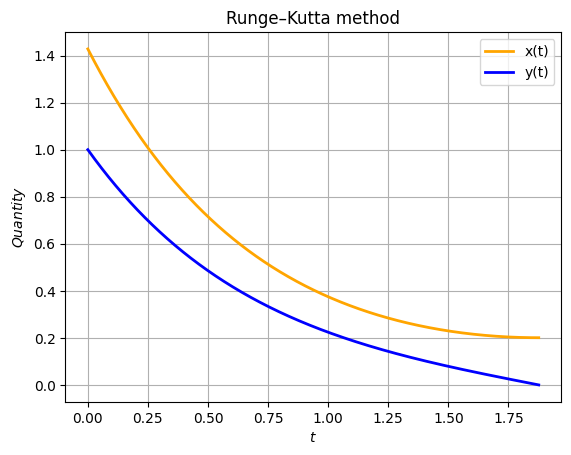

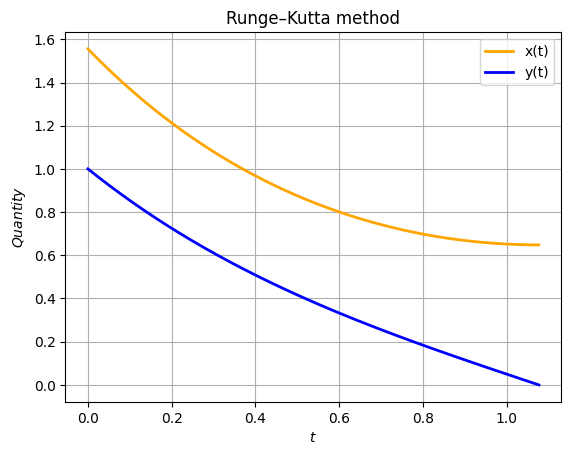

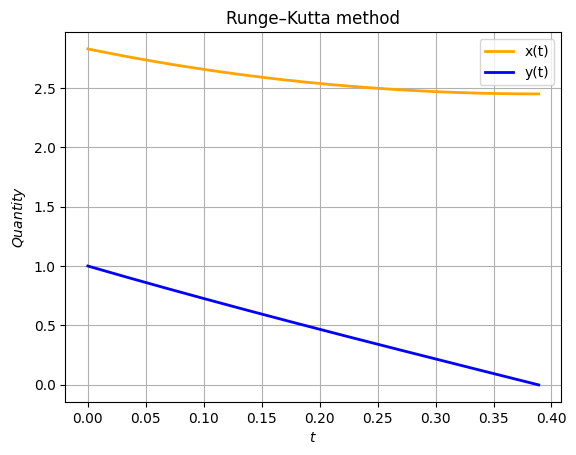

In [49]:
dt = 0.001

def backward_euler_vector_war(A, u0, dt):
    """Решает."""
    y = []
    k = 0
    y.append(u0)
    C2 = 1-dt*A[1][1] - (dt**2 * A[1][0] * A[0][1])/(1-dt*A[0][0])
    K2 = dt*A[1][0]/(1-dt*A[0][0])
    while True:
        y_next = (K2 * y[k][0] + y[k][1])/C2
        x_next = (y[k][0] + dt * A[0][1] * y_next)/(1 - dt * A[0][0])
        y.append([x_next, y_next])
        if y_next <= 0 or x_next <= 0: break
        k+=1
    tt = np.arange(k+2)*dt
    return tt, y
u0_=[[np.sqrt(2)*(1+10**(-2)),1],[np.sqrt(2)*(1+10**(-1)), 1],[np.sqrt(2)*2, 1]]
C = [[0, -2],[-1, 0]]
for u0 in u0_:

    tt, y = backward_euler_vector_war(C, u0=u0, dt = dt)
    y_1 = [i[0] for i in y]
    y_2 = [i[1] for i in y]
    plt.title("Euler backward method")
    plt.ylabel("$Quantity$")
    plt.xlabel("$t$")
    plt.plot(tt, y_1, '-', lw=2, color='orange',label="x(t)")
    plt.plot(tt, y_2, '-', lw=2, color='blue',label="y(t)")
    plt.grid(True)
    plt.legend()
    plt.show()


def that_thing(A, u0, dt):
    """Решает хорошо :)"""
    y = []
    k = 0
    y.append(u0)
    C2 = 1-dt*A[1][1] - (dt**2 * A[1][0] * A[0][1])/(1-dt*A[0][0])
    K2 = dt*A[1][0]/(1-dt*A[0][0])
    while True:
        y_ = (K2 * y[k][0] + y[k][1])/C2
        x_ = (y[k][0] + dt * A[0][1] * y_)/(1 - dt * A[0][0])
        y_next = y[k][1] + dt/2*(A[1][0]*y[k][0]+A[1][1]*y[k][1]+A[1][0]*x_+A[1][1]*y_)
        x_next = y[k][0] + dt/2*(A[0][0]*y[k][0]+A[0][1]*y[k][1]+A[0][0]*x_+A[0][1]*y_)
        y.append([x_next, y_next])
        if y_next <= 0 or x_next <= 0: break
        k+=1
    tt = np.arange(k+2)*dt
    return tt, y

for u0 in u0_:
    tt, y = that_thing(C, u0=u0, dt = dt)
    y_1 = [i[0] for i in y]
    y_2 = [i[1] for i in y]
    plt.title("Runge–Kutta method")
    plt.ylabel("$Quantity$")
    plt.xlabel("$t$")
    plt.plot(tt, y_1, '-', lw=2, color='orange',label="x(t)")
    plt.plot(tt, y_2, '-', lw=2, color='blue',label="y(t)")
    plt.grid(True)
    plt.legend()
    plt.show()

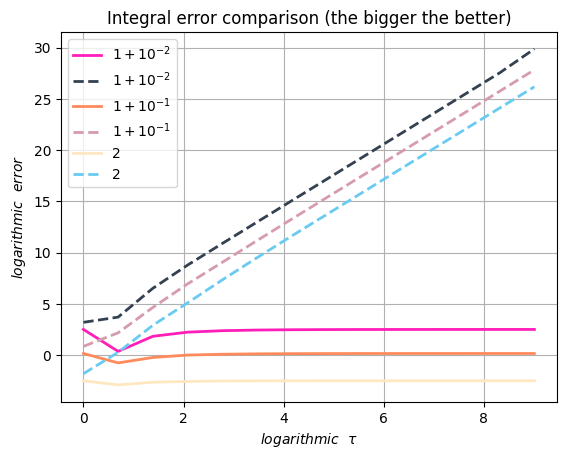

In [62]:
u0_=[[np.sqrt(2)*(1+10**(-2)),1],[np.sqrt(2)*(1+10**(-1)), 1],[np.sqrt(2)*2, 1]]
C = [[0, -2],[-1, 0]]


def BE_Integral_Of_Waaaar(A, u0, I_0, dt):
    """Решает еще лучше!"""
    y, k = [], 0
    y.append(u0)

    C2 = 1-dt*A[1][1] - (dt**2 * A[1][0] * A[0][1])/(1-dt*A[0][0])
    K2 = dt*A[1][0]/(1-dt*A[0][0])

    while True:


        y_next = (K2 * y[k][0] + y[k][1])/C2
        x_next = (y[k][0] + dt * A[0][1] * y_next)/(1 - dt * A[0][0])

        y.append([x_next, y_next])
        if y_next <= 0 or x_next <= 0: break
        k+=1

    I = -abs(A[0][1]*y_next**2+x_next**2)
    dI = -np.log(np.abs(I-I_0))
    return dI


def kek(A, u0, I_0, dt):
    """(kek)"""

    y, k = [], 0
    y.append(u0)

    C2 = 1-dt*A[1][1] - (dt**2 * A[1][0] * A[0][1])/(1-dt*A[0][0])
    K2 = dt*A[1][0]/(1-dt*A[0][0])
    while True:


        y_ = (K2 * y[k][0] + y[k][1])/C2
        x_ = (y[k][0] + dt * A[0][1] * y_)/(1 - dt * A[0][0])
        y_next = y[k][1] + dt/2*(A[1][0]*y[k][0]+A[1][1]*y[k][1]+A[1][0]*x_+A[1][1]*y_)
        x_next = y[k][0] + dt/2*(A[0][0]*y[k][0]+A[0][1]*y[k][1]+A[0][0]*x_+A[0][1]*y_)

        y.append([x_next, y_next])

        if y_next <= 0 or x_next <= 0: break
        k+=1

    I = abs(A[0][1]*y_next**2+x_next**2)
    dI = -np.log(np.abs(I-I_0))
    return dI

labels = ["$1+10^{-2}$","$1+10^{-1}$","2"]
for u0 in u0_:
    I_0 = abs(C[0][1]*u0[1]**2+u0[0]**2)
    i, dt, alpha = 1, 1, 1
    tt, dI_BE, dI_RK = [], [], []
    while dt > 10**(-4):

        tt.append(-np.log(dt))

        dI_BE.append(BE_Integral_Of_Waaaar(C, u0=u0, I_0=I_0, dt=dt))
        dI_RK.append(kek(C, u0=u0, I_0=I_0, dt=dt))
        dt = alpha*2**(-i)
        i += 1
    plt.ylabel("$logarithmic~~error$")
    plt.xlabel("$logarithmic~~\\tau$")
    plt.plot(tt, dI_BE, '-', lw=2, color=('#%06X' % randint(0xFF00FF, 0xFFFAFF)),label=labels[0])
    plt.plot(tt, dI_RK, '--', lw=2, color=('#%06X' % randint(0x110011, 0xFF00FF)),label=labels[0])
    labels.pop(0)

plt.title("Integral error comparison (the bigger the better)")
plt.grid(True)
plt.legend()
plt.show()

Полученные кривые соотносятся с теоретическим порядком аппроксимации схем прямопропорционально :)

Вернёмся к аналитическому рассмотрению.
Найдите явно решение $\mathbf{x}(t)$ в зависимости от начальных $x_1(0), x_2(0)$, выразив через них $C_{\pm}$.
Получите формулу для времени окончания войны $T(x_1(0), x_2(0))$.
Постройте на одном холсте при $c=\frac{3}{2}$
* Несколько фазовых траекторий (линий $I(x_1,x_2) = const$ с различными константами)
* Несколько линий уровня $T(x_1(0), x_2(0))$ (ГМТ начальных данных, где время войны фиксированно)

Итоговый график должен быть информативным, не забудьте в частности указать чему равны $T$ на изолиниях (лучше подписать на самих линиях как в `plt.clabel(curves)`, а не в легенде)

Можете ли вы получить асимтотическое выражение для $T$ при $x_1(0) = x_{1min} + \epsilon, \epsilon\ll1$?

(3 point)

$\mathbf{x}(t) = 1/2(y_0 + \frac{x_0}{\sqrt{C}})
\begin{pmatrix}
\sqrt{C} \\
1
\end{pmatrix}e^{-\sqrt{C}t} + 1/2(y_0 - \frac{x_0}{\sqrt{C}})
\begin{pmatrix}
-\sqrt{C} \\
1
\end{pmatrix}e^{\sqrt{C}t} $

$(y_0 + \frac{x_0}{\sqrt{C}})
e^{-\sqrt{C}T} + (y_0 - \frac{x_0}{\sqrt{C}})
e^{\sqrt{C}T} = 0$

$Re(T) = \frac{1}{2\sqrt{C}}ln(\frac{x_0 + \sqrt{C}y_0}{x_0 - \sqrt{C}y_0})
=(\gamma = x_0/y_0) = \frac{1}{2\sqrt{C}}ln(\frac{\gamma + \sqrt{C}}{\gamma - \sqrt{C}})$

$x_1(0) = x_{1min} + \epsilon, \epsilon\ll1 \Leftrightarrow \gamma \rightarrow \sqrt{C} \Rightarrow T \rightarrow \infty$

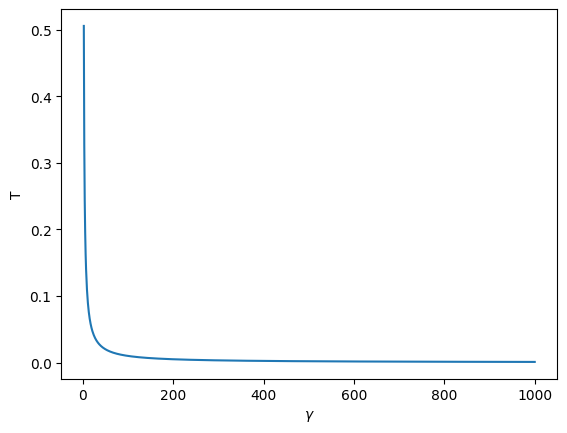

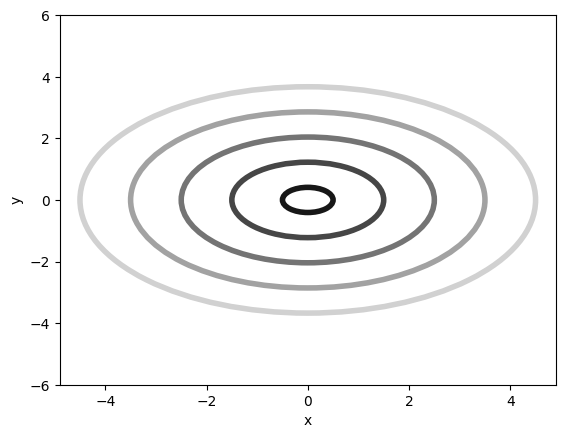

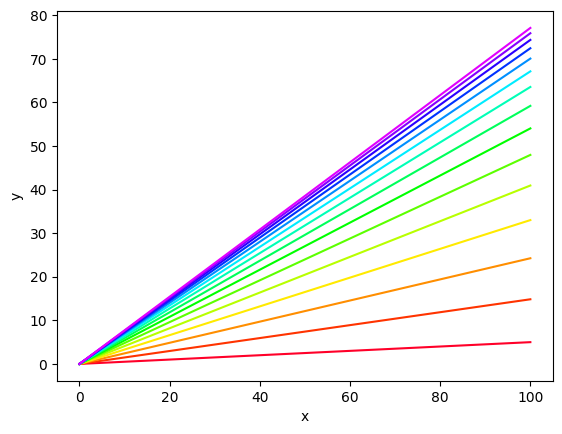

In [51]:
c = np.sqrt(3/2)

def fun(x):
    return 1/(2*c) * np.log((x+c)/(x-c))


def level(x, tau):
    return x/c*((np.exp(2*c*tau)-1)/(np.exp(2*c*tau)+1))


x = np.linspace(c+1, 1000, 1000)
x_level = np.linspace(0, 100, 100)

plt.plot(x,fun(x))
plt.xlabel("$\gamma$")
plt.ylabel("T")
plt.show()
ax = plt.gca()


for i in range(1,11,2):
    ellipse = pts.Ellipse(xy=(0,0), height=i/c, width=i, alpha=1-i/11, edgecolor='black', lw=4, facecolor='none')
    ax.add_artist(ellipse)
ax.set(xlim=[-6/c, 6/c], ylim=[-6, 6], xlabel="x", ylabel="y")

plt.show()

t=0.05
NUM_COLORS = 15

fig = plt.figure()
cm = plt.get_cmap('gist_rainbow')
ax1 = fig.add_subplot(111)
ax1.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i in range(NUM_COLORS):
    ax1.plot(x_level, level(x_level, t))
    t+=0.1
ax1.set(xlabel="x", ylabel="y")

plt.show()